In [1]:
%matplotlib inline

In [2]:
from tensorflow.keras.applications import inception_v3
from tensorflow.keras import backend as K
#from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
K.set_learning_phase(0)

model = inception_v3.InceptionV3(weights='imagenet',include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
for layer in model.layers:
    #if layer.name.startswith("activation_"):
    print (layer.name)

input_1
conv2d
batch_normalization_v1
activation
conv2d_1
batch_normalization_v1_1
activation_1
conv2d_2
batch_normalization_v1_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_v1_3
activation_3
conv2d_4
batch_normalization_v1_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_v1_8
activation_8
conv2d_6
conv2d_9
batch_normalization_v1_6
batch_normalization_v1_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_v1_5
batch_normalization_v1_7
batch_normalization_v1_10
batch_normalization_v1_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_v1_15
activation_15
conv2d_13
conv2d_16
batch_normalization_v1_13
batch_normalization_v1_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_v1_12
batch_normalization_v1_14
batch_normalization_v1_17
batch_normalization_v1_18
activation_12
activation_14
activation_17
activation_18
mix

In [4]:
np.array(model.layers[len(model.layers)-1].get_weights()[0]).shape

(2048, 1000)

In [5]:
activation_layers = [ layer.output for layer in model.layers if layer.name.startswith("activation_")]

In [6]:
layer_names = [ layer.name for layer in model.layers if layer.name.startswith("activation_")]
layer_names

['activation_1',
 'activation_2',
 'activation_3',
 'activation_4',
 'activation_8',
 'activation_6',
 'activation_9',
 'activation_5',
 'activation_7',
 'activation_10',
 'activation_11',
 'activation_15',
 'activation_13',
 'activation_16',
 'activation_12',
 'activation_14',
 'activation_17',
 'activation_18',
 'activation_22',
 'activation_20',
 'activation_23',
 'activation_19',
 'activation_21',
 'activation_24',
 'activation_25',
 'activation_27',
 'activation_28',
 'activation_26',
 'activation_29',
 'activation_34',
 'activation_35',
 'activation_31',
 'activation_36',
 'activation_32',
 'activation_37',
 'activation_30',
 'activation_33',
 'activation_38',
 'activation_39',
 'activation_44',
 'activation_45',
 'activation_41',
 'activation_46',
 'activation_42',
 'activation_47',
 'activation_40',
 'activation_43',
 'activation_48',
 'activation_49',
 'activation_54',
 'activation_55',
 'activation_51',
 'activation_56',
 'activation_52',
 'activation_57',
 'activation_50',
 

In [7]:
from tensorflow.keras.models import Model
activation_model = Model(inputs=model.input, outputs=activation_layers)

In [8]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    img = image.img_to_array(img)
    #convert single image to a batch with 1 image
    img = np.expand_dims(img, axis=0)    
    img = inception_v3.preprocess_input(img)
    return img

base_image_path = 'labrador.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)

In [9]:
activations = activation_model.predict(img)

In [10]:
print(len(activation_layers))
#activations[93].shape
activations[92].shape

93


(1, 8, 8, 192)

In [11]:
import matplotlib.pyplot as plt
#plt.matshow(activations[7][0, :, :, 0], cmap='viridis')
#plt.show()

In [12]:
print("Number of Layers", len(activations))

Number of Layers 93


In [13]:
layer_names[46]

'activation_43'

(192, 128)


/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


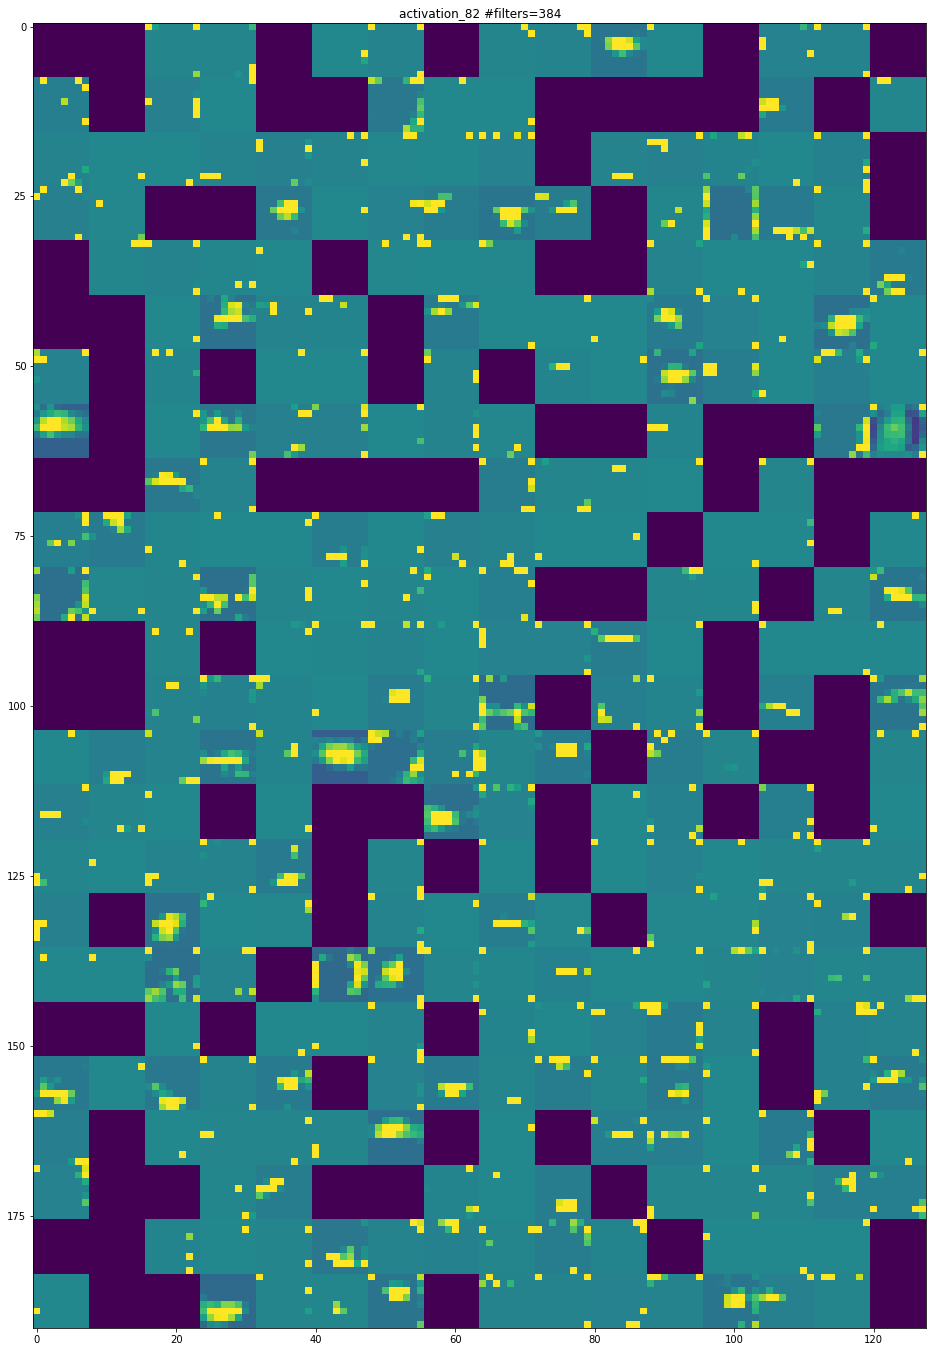

In [14]:
images_per_row = 16
idx = 80
# Now let's display our feature maps
for layer_activation in activations[idx:idx+1]:
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size1, size2, n_features)
    r = layer_activation.shape[1]
    c = layer_activation.shape[2]
    
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((r * n_cols, images_per_row * c))
    print(display_grid.shape)
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * r : (col + 1) * r,
            row * c : (row + 1) * c] = channel_image
    # Display the grid
    scale = 1. / r
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_names[idx]+" #filters="+str(n_features))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [15]:
images_per_row = 8
idx = 1
# Now let's display our feature maps
layer_activation=activations[idx]
# This is the number of features in the feature map
n_features = layer_activation.shape[-1]
# The feature map has shape (1, size1, size2, n_features)
r = layer_activation.shape[1]
c = layer_activation.shape[2]
    
# We will tile the activation channels in this matrix
n_cols = n_features // images_per_row
display_grid = np.zeros((r * n_cols, images_per_row * c))
print(display_grid.shape)


(1176, 1176)


In [16]:
plt.show()

## CNN Visualization by Gradient Accent

In [17]:
#layer_name = 'activation_94'
layer_name = 'activation_93'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [18]:
grads = K.gradients(loss, model.input)[0]
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [19]:
iterate = K.function([model.input], [loss, grads])
# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [20]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
# Run gradient ascent for 40 steps
step = 1. # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [21]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [22]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    # Run gradient ascent for 40 steps
    step = 2.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        img = input_img_data[0]
    return deprocess_image(img)

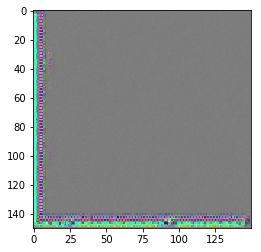

In [23]:
plt.imshow(generate_pattern('activation_2', 1))

In [24]:
plt.show()

In [25]:
idx = 0
layer_name = layer_names[idx]
images_per_row = 8
size = 64
margin = 5

n_features = activation_layers[idx].shape[-1]
n_cols = n_features // images_per_row

In [26]:
n_features, n_cols

(Dimension(32), Dimension(4))

In [27]:

# This a empty (black) image where we will store our results.
results = np.zeros((images_per_row * size + 7 * margin, images_per_row * size + 7 * margin, 3))
for i in range(n_cols): # iterate over the rows of our results grid
    for j in range(images_per_row): # iterate over the columns of our results grid
    # Generate the pattern for filter `i + (j * 8)` in `layer_name`
        filter_img = generate_pattern(layer_name, (i * images_per_row) +j, size=size)
        # Put the result in the square `(i, j)` of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


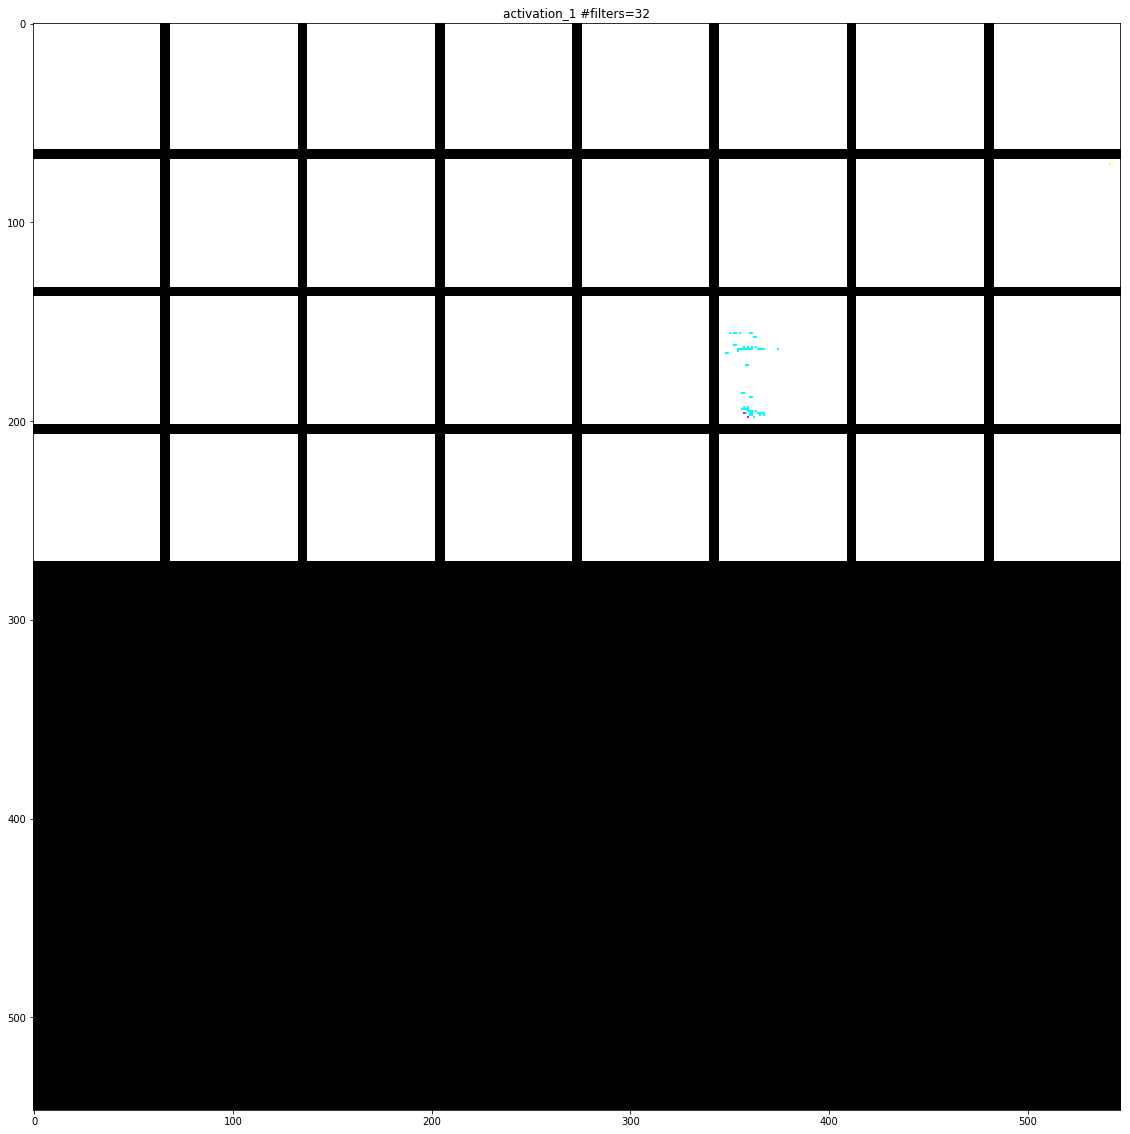

In [28]:
# Display the results grid
plt.figure(figsize=(20, 20))
plt.title(layer_names[idx]+" #filters="+str(n_features))
plt.imshow(results)
plt.show()

## Deep Dream

In [29]:
layer_name = 'activation_41'
activation = model.get_layer(layer_name).output

# We avoid border artifacts by only involving non-border pixels in the loss.
scaling = K.prod(K.cast(K.shape(activation), 'float32'))
loss = K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

# This holds our generated image
dream = model.input

# Compute the gradients of the dream with regard to the loss.
grads = K.gradients(loss, dream)[0]

# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)


iterate_grad_ac_step = K.function([dream], [loss, grads])

In [30]:
def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = iterate_grad_ac_step([x])
        print('...Loss value at', i, ':', loss_value)
        if max_loss is not None and loss_value > max_loss:
            break        
        x += step * grad_values
    return x

In [31]:
import scipy

def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)


In [32]:
num_octave = 4 # Number of scales at which to run gradient ascent
octave_scale = 1.4 # Size ratio between scales
iterations = 20 # Number of ascent steps per scale

# If our loss gets larger than 10, 
# we will interrupt the gradient ascent process, to avoid ugly artifacts
max_loss = 20.

base_image_path = 'blue-sky.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)
print(img.shape)
# We prepare a list of shape tuples
# defining the different scales at which we will run gradient ascent
original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)

# Reverse list of shapes, so that they are in increasing order
successive_shapes = successive_shapes[::-1]

# Resize the Numpy array of the image to our smallest scale
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

print(successive_shapes)

(1, 299, 299, 3)
[(108, 108), (152, 152), (213, 213), (299, 299)]


In [33]:
MAX_ITRN = 20
MAX_LOSS = 20
learning_rate = 0.01

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=MAX_ITRN,
                          step=learning_rate,
                          max_loss=MAX_LOSS)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    print('adding lost details', lost_detail.shape)
    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    save_img(img, fname='dream_at_scale_' + str(shape) + '.png')

save_img(img, fname='final_dream.png')


Processing image shape (108, 108)
...Loss value at 0 : 0.008053758
...Loss value at 1 : 0.029692436
...Loss value at 2 : 0.06846469
...Loss value at 3 : 0.103291295
...Loss value at 4 : 0.16244784
...Loss value at 5 : 0.20856409
...Loss value at 6 : 0.23636469
...Loss value at 7 : 0.2653571
...Loss value at 8 : 0.31170568
...Loss value at 9 : 0.32389113
...Loss value at 10 : 0.3629553
...Loss value at 11 : 0.38530153
...Loss value at 12 : 0.412429
...Loss value at 13 : 0.42966926
...Loss value at 14 : 0.49112856
...Loss value at 15 : 0.4828407
...Loss value at 16 : 0.5257854
...Loss value at 17 : 0.5479646
...Loss value at 18 : 0.55252296
...Loss value at 19 : 0.5898573
adding lost details (1, 108, 108, 3)
Processing image shape (152, 152)
...Loss value at 0 : 0.10920883
...Loss value at 1 : 0.26791015
...Loss value at 2 : 0.42658997
...Loss value at 3 : 0.5400769
...Loss value at 4 : 0.63022935
...Loss value at 5 : 0.6920135
...Loss value at 6 : 0.7982459
...Loss value at 7 : 0.903185

/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


...Loss value at 11 : 1.222429
...Loss value at 12 : 1.3329598
...Loss value at 13 : 1.3797604
...Loss value at 14 : 1.4439014
...Loss value at 15 : 1.5162224
...Loss value at 16 : 1.5994828
...Loss value at 17 : 1.6814713
...Loss value at 18 : 1.7722541
...Loss value at 19 : 1.7688488
adding lost details (1, 152, 152, 3)
Processing image shape (213, 213)
...Loss value at 0 : 0.2138379
...Loss value at 1 : 0.41335124
...Loss value at 2 : 0.545382
...Loss value at 3 : 0.638868
...Loss value at 4 : 0.7343561
...Loss value at 5 : 0.81172436
...Loss value at 6 : 0.9251786
...Loss value at 7 : 0.9845108
...Loss value at 8 : 1.0789529
...Loss value at 9 : 1.1629541
...Loss value at 10 : 1.2322786
...Loss value at 11 : 1.2843755
...Loss value at 12 : 1.3665917
...Loss value at 13 : 1.4047067
...Loss value at 14 : 1.4586163
...Loss value at 15 : 1.4832239
...Loss value at 16 : 1.5632904
...Loss value at 17 : 1.6010278
...Loss value at 18 : 1.6801999
...Loss value at 19 : 1.7372034
adding lost 

## Heatmaps of class activation

In [34]:
base_image_path = 'labrador.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)

In [35]:
preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02099601', 'golden_retriever', 0.496629), ('n02099712', 'Labrador_retriever', 0.33014655), ('n04409515', 'tennis_ball', 0.0038336494)]


In [36]:
np.argmax(preds[0])

207

In [37]:
# This is the "african elephant" entry in the prediction vector
dog_output = model.output[:, 208]
# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
#last_conv_layer = model.get_layer('activation_94')
last_conv_layer = model.get_layer('activation_93')
# This is the gradient of the "dog" class with regard to
# the output feature map of `activation_94`
grads = K.gradients(dog_output, last_conv_layer.output)[0]

Instructions for updating:
Use tf.cast instead.
